### Background:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

### Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

### Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)


### Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

### Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.


In [1]:
# import modules
import random
import os
import warnings
# ignore warnings
warnings.filterwarnings('ignore')

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
# load the dataset
df = pd.read_csv('term-deposit-marketing-2020.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


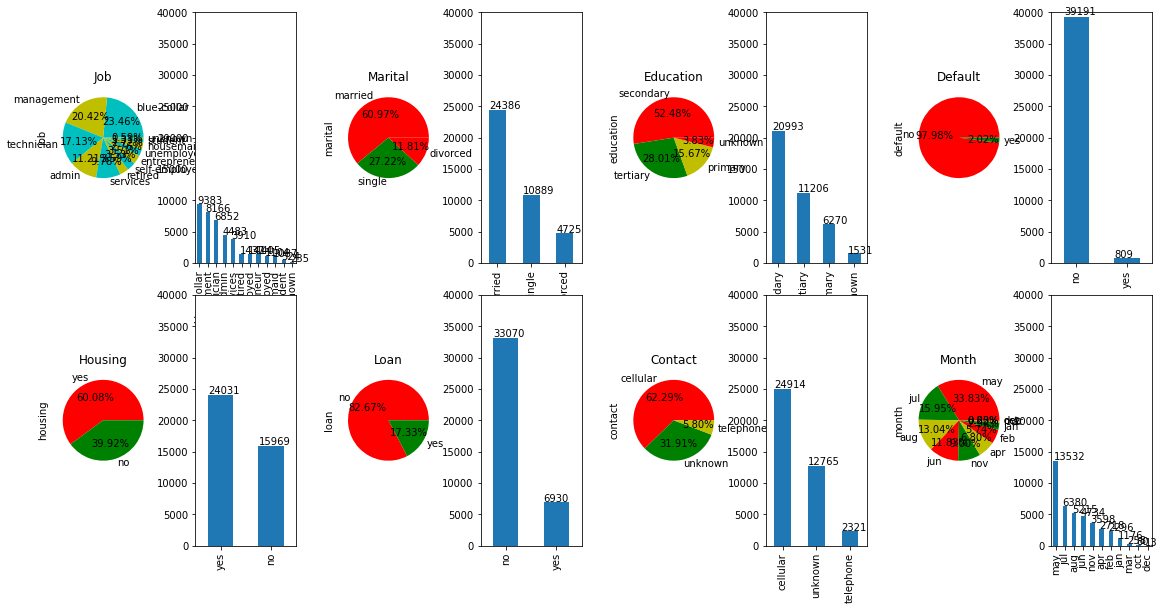

In [6]:
#fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
#= plt.subplots(nrows=4, ncols=4, figsize=(12,8))

fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=2, ncols=8, figsize=(16,8))
fig.tight_layout()


#fig, ax = plt.subplots(2,16, figsize=(16,4))

ax1.set_title("Job")
df.job.value_counts().plot.pie(autopct='%.2f%%', ax=ax1, colors='cy')
df.job.value_counts().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax2.set_ylim(0,40000)

ax3.set_title("Marital")
df.marital.value_counts().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
df.marital.value_counts().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax4.set_ylim(0,40000)

ax5.set_title("Education")
df.education.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax5, colors='rgy')
df.education.value_counts(dropna=False).plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax6.set_ylim(0,40000)

ax7.set_title("Default")
df.default.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax7, colors='rgy')
df.default.value_counts(dropna=False).plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax8.set_ylim(0,40000)

ax9.set_title("Housing")
df.housing.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax9, colors='rgy')
df.housing.value_counts(dropna=False).plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax10.set_ylim(0,40000)

    
ax11.set_title("Loan")
df.loan.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax11, colors='rgy')
df.loan.value_counts(dropna=False).plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax12.set_ylim(0,40000)

ax13.set_title("Contact")
df.contact.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax13, colors='rgy')
df.contact.value_counts(dropna=False).plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax14.set_ylim(0,40000)

ax15.set_title("Month")
df.month.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax15, colors='rgy')
df.month.value_counts(dropna=False).plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax16.set_ylim(0,40000)

    
plt.show()


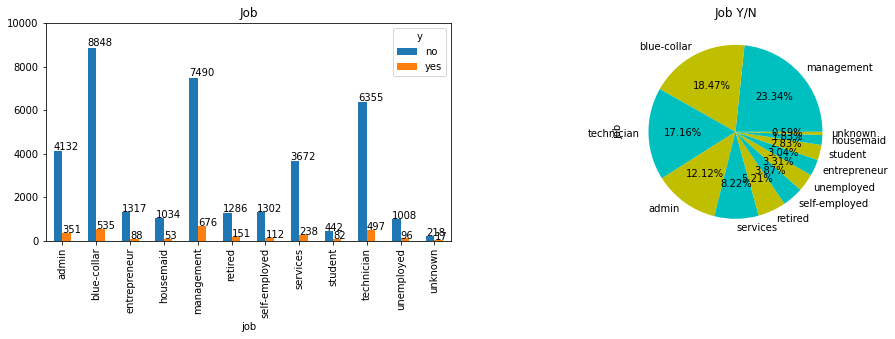

In [7]:
#tabm72 = pd.crosstab(df['job'] , df['y'])
#tabm72.plot(kind='bar')


fig, ax = plt.subplots(1,2, figsize=(16,4))

ax[0].set_title("Job")
cross1 = pd.crosstab(df['job'] , df['y'])
cross1.plot(kind='bar', ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[0].set_ylim(0,10000)

ax[1].set_title("Job Y/N")
dfy = df[(df['y'] == 'yes')]
dfy.job.value_counts().plot.pie(autopct='%.2f%%', ax=ax[1], colors='cy')



    
plt.show()


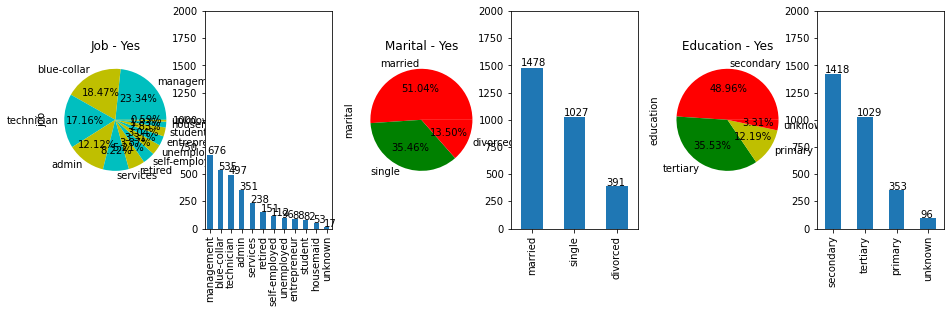

In [8]:
dfy = df[(df['y'] == 'yes')]
fig, ax = plt.subplots(1,6, figsize=(16,4))

ax[0].set_title("Job - Yes")
dfy.job.value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], colors='cy')
dfy.job.value_counts().plot(kind='bar', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[1].set_ylim(0,2000)

ax[2].set_title("Marital - Yes")
dfy.marital.value_counts().plot.pie(autopct='%.2f%%', ax=ax[2], colors='rg')
dfy.marital.value_counts().plot(kind='bar', ax=ax[3])
for p in ax[3].patches:
    ax[3].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[3].set_ylim(0,2000)

ax[4].set_title("Education - Yes")
dfy.education.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax[4], colors='rgy')
dfy.education.value_counts(dropna=False).plot(kind='bar', ax=ax[5])
for p in ax[5].patches:
    ax[5].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[5].set_ylim(0,2000)

    
plt.show()


In [9]:
# Creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

age
Skew : 0.44


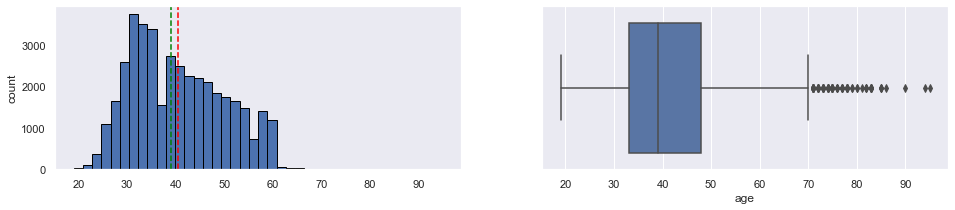

balance
Skew : 8.26


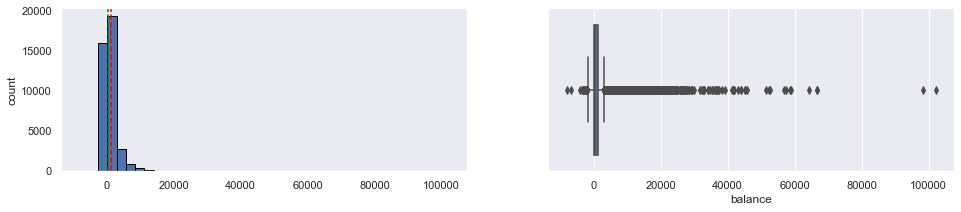

day
Skew : 0.07


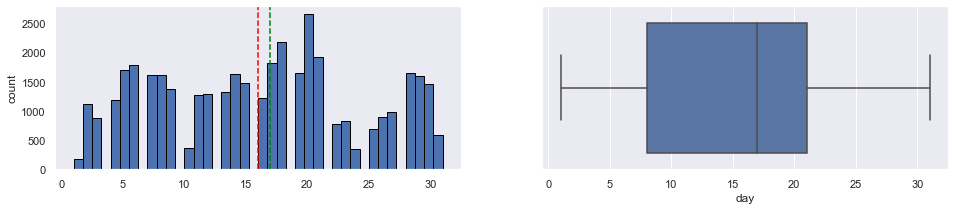

duration
Skew : 3.17


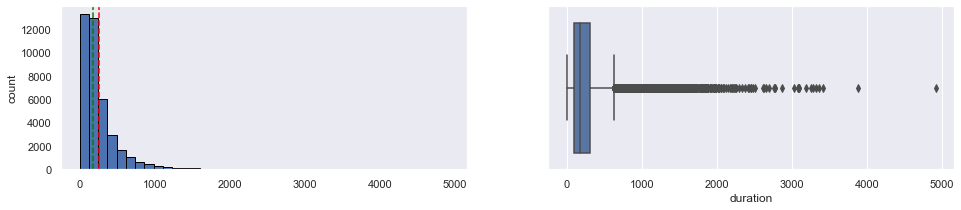

campaign
Skew : 4.73


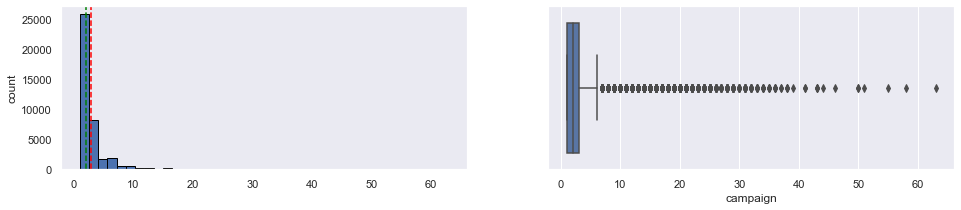

In [10]:
# Plotting a histogram and boxplot to check the distribution of our numerical data
sns.set(font_scale = 1)
cont_cols = list(df[num_cols])
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(16,3))
    plt.subplot(1,2,1)
    df[col].hist(bins=40, grid=False, ec='black')
    plt.axvline(x = df[col].mean(), linestyle ="--", color ='red')
    plt.axvline(x = df[col].median(), linestyle ="--", color ='green')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()